In [19]:
import pandas as pd
import seaborn as sns
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
                                      
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [20]:
airlines = pd.read_csv('datasets/geo/airlines.csv')
airports = pd.read_csv('datasets/geo/airports.csv')
routes = pd.read_csv('datasets/geo/routes.csv')

In [21]:
airlines.iloc[0]

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object

In [22]:
airports.iloc[0]

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object

In [23]:
routes.iloc[0]

airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object

/opt/anaconda3/envs/MLHandsOnBook/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


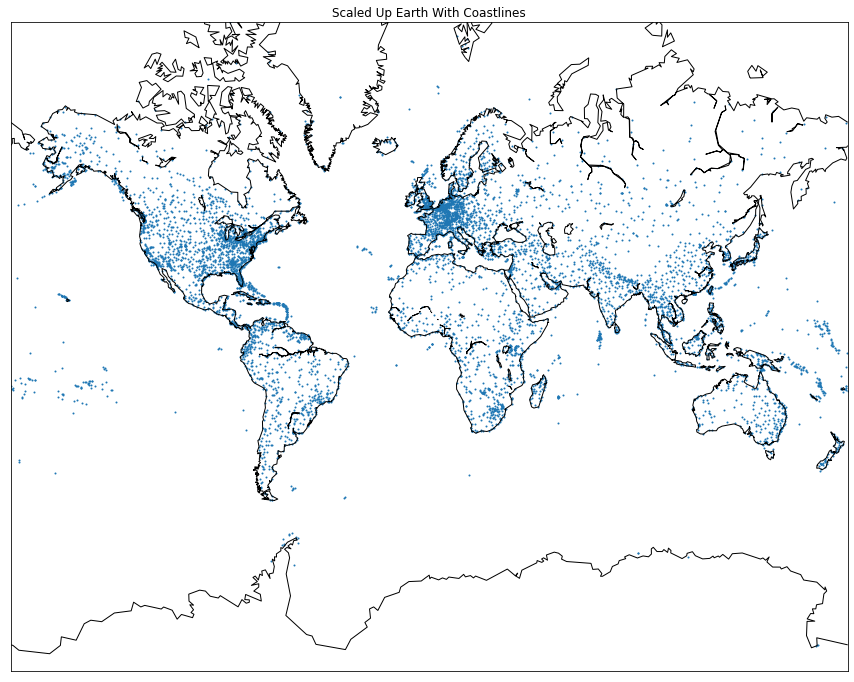

In [54]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")

m = Basemap(projection='merc', llcrnrlat=-80,
            urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

x, y = m(airports['longitude'].tolist(), airports['latitude'].tolist())

m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

In [57]:
geo_routes = pd.read_csv('datasets/geo/geo_routes.csv')
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airline    67428 non-null  object 
 1   source     67428 non-null  object 
 2   dest       67428 non-null  object 
 3   equipment  67410 non-null  object 
 4   start_lon  67428 non-null  float64
 5   end_lon    67428 non-null  float64
 6   start_lat  67428 non-null  float64
 7   end_lat    67428 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [58]:
geo_routes.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


/opt/anaconda3/envs/MLHandsOnBook/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


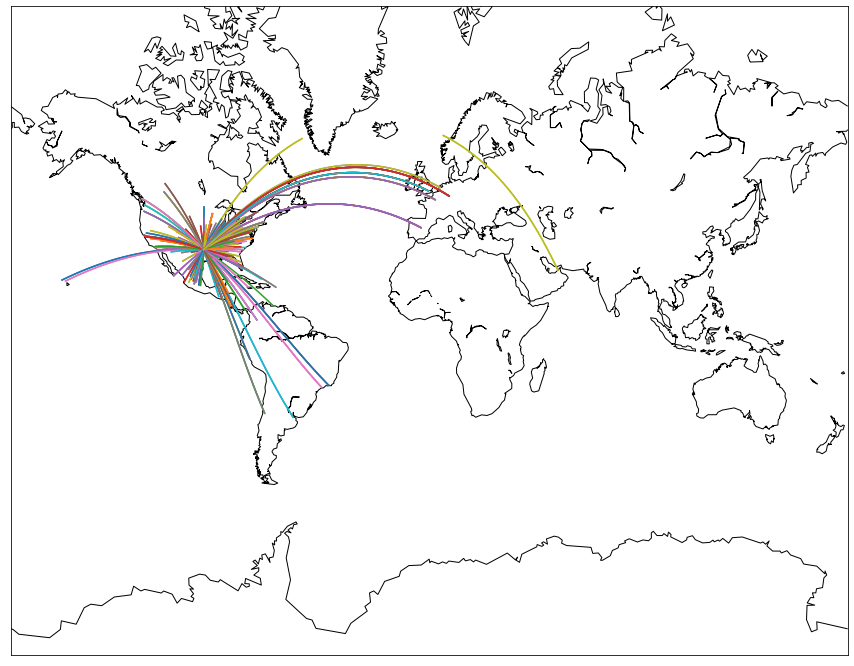

In [64]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        start_lat = row['start_lat']
        end_lat = row['end_lat']
        start_lon = row['start_lon']
        end_lon = row['end_lon']
        
        if (abs(end_lat - start_lat) < 180) and (abs(end_lon - start_lon) < 180):
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
            
dfw = geo_routes[geo_routes['source'] == 'DFW']
create_great_circles(dfw)

plt.show()